## Importing Libraries

In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Collection and Preprocessing

In [481]:
# loading the dataset to pandas DataFrame
df = pd.read_excel("Credit_history_dataset.xlsx")

In [482]:
# printing the first 5 rows of the dataframe
df

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Number of Dependents,Unnamed: 11,Education,Credit_History
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,NaN,Graduate,1.0
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,NaN,Graduate,1.0
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,NaN,Graduate,1.0
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,NaN,Not Graduate,1.0
4,5,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,NaN,Not Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,0.124801,62,0,0.566894,6584.0,15,0,2,0,0.0,NaN,Graduate,1.0
610,611,0.016995,62,0,0.002302,5212.0,4,0,0,0,0.0,NaN,Graduate,1.0
611,612,0.964038,29,1,0.263517,2200.0,6,0,0,0,0.0,NaN,Graduate,1.0
612,613,0.211206,44,1,0.213839,2080.0,13,1,0,1,0.0,NaN,Graduate,1.0


In [483]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [484]:
# statistical measures
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Number of Dependents,Unnamed: 11,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,520.000000,614.000000,614.000000,614.000000,614.000000,594.000000,0.0,564.000000
mean,307.500000,4.134929,51.566775,0.276873,329.584908,6740.253846,8.413681,0.087948,0.991857,0.063518,0.762626,NaN,0.842199
std,177.390811,94.422259,14.928146,0.812757,1185.509417,10248.079993,5.095647,0.385823,1.020954,0.334339,1.112197,NaN,0.364878
min,1.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,154.250000,0.036255,40.000000,0.000000,0.156939,3416.000000,5.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
50%,307.500000,0.181647,52.000000,0.000000,0.349951,5250.000000,8.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000
75%,460.750000,0.575115,62.000000,0.000000,0.670266,8176.000000,11.000000,0.000000,2.000000,0.000000,1.000000,NaN,1.000000
max,614.000000,2340.000000,97.000000,10.000000,15466.000000,208333.000000,31.000000,3.000000,8.000000,5.000000,6.000000,NaN,1.000000


In [485]:
credit_history=df.drop(columns=['Unnamed: 11'],axis=1)

In [486]:
# printing the first 5 rows of the dataframe
credit_history.head()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Number of Dependents,Education,Credit_History
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Graduate,1.0
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,Graduate,1.0
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,Graduate,1.0
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,Not Graduate,1.0
4,5,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,Not Graduate,1.0


In [487]:
# number of missing values in each column
credit_history.isnull().sum()

ID                                       0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
NumberOfTime30-59DaysPastDueNotWorse     0
DebtRatio                                0
MonthlyIncome                           94
NumberOfOpenCreditLinesAndLoans          0
NumberOfTimes90DaysLate                  0
NumberRealEstateLoansOrLines             0
NumberOfTime60-89DaysPastDueNotWorse     0
Number of Dependents                    20
Education                                0
Credit_History                          50
dtype: int64

In [488]:
# Impute missing values for Dependents
credit_history['Number of Dependents'].fillna(credit_history['Number of Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
credit_history['Credit_History'].fillna(credit_history['Credit_History'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
credit_history['MonthlyIncome'] = credit_history['MonthlyIncome'].fillna(credit_history['MonthlyIncome'].mean())

In [489]:
# number of missing values in each column
credit_history.isnull().sum()

ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Number of Dependents                    0
Education                               0
Credit_History                          0
dtype: int64

## Data Visualization

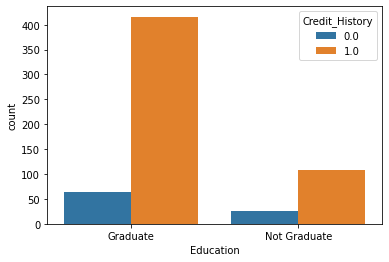

In [490]:
# education & credit_history
sns.countplot(x='Education',hue='Credit_History',data=credit_history)

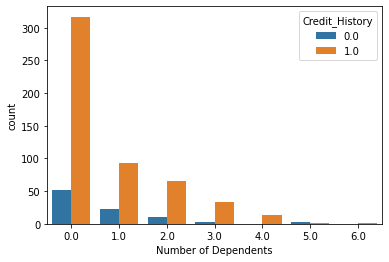

In [491]:
# Number of Dependents & Credit_History
sns.countplot(x='Number of Dependents',hue='Credit_History',data=credit_history)

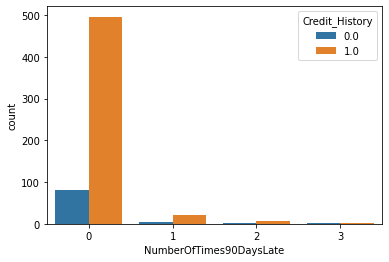

In [492]:
# NumberOfTimes90DaysLate & Credit_History
sns.countplot(x='NumberOfTimes90DaysLate',hue='Credit_History',data=credit_history)

In [493]:
credit_history.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [494]:
# printing the first 5 rows of the dataframe
credit_history.head(30)

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Number of Dependents,Education,Credit_History
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,1,1.0
1,2,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,1,1.0
2,3,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,1,1.0
3,4,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,0,1.0
4,5,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,0,1.0
5,6,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0,1,1.0
6,7,0.305682,57,0,5710.000000,6740.253846,8,0,3,0,0.0,0,1.0
7,8,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0,1,0.0
8,9,0.116951,27,0,46.000000,6740.253846,2,0,0,0,0.0,1,1.0
9,10,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0,1,1.0


In [495]:
credit_history.drop(columns=['ID'],axis=1,inplace=True)

In [496]:
# printing the first 5 rows of the dataframe
credit_history.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Number of Dependents,Education,Credit_History
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1,1.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,1,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,1,1.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,1.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,1.0


In [497]:
# separating the data and label
X = credit_history.drop(columns=['Credit_History'],axis=1)
Y = credit_history['Credit_History']

In [542]:
print(X)
print(Y)

     RevolvingUtilizationOfUnsecuredLines  age  ...  Number of Dependents  Education
0                                0.766127   45  ...                   2.0          1
1                                0.957151   40  ...                   1.0          1
2                                0.658180   38  ...                   0.0          1
3                                0.233810   30  ...                   0.0          0
4                                0.233810   30  ...                   0.0          0
..                                    ...  ...  ...                   ...        ...
609                              0.124801   62  ...                   0.0          1
610                              0.016995   62  ...                   0.0          1
611                              0.964038   29  ...                   0.0          1
612                              0.211206   44  ...                   0.0          1
613                              0.184477   32  ...              

## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [499]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [500]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.16935784 0.14924415 0.03715844 0.14608464 0.14607692 0.14318729
 0.02002315 0.07755317 0.01356171 0.08139196 0.01636074]


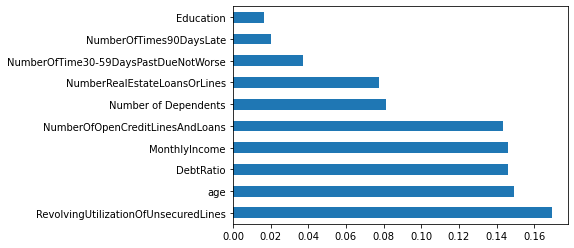

RevolvingUtilizationOfUnsecuredLines    0.169358
age                                     0.149244
NumberOfTime30-59DaysPastDueNotWorse    0.037158
DebtRatio                               0.146085
MonthlyIncome                           0.146077
NumberOfOpenCreditLinesAndLoans         0.143187
NumberOfTimes90DaysLate                 0.020023
NumberRealEstateLoansOrLines            0.077553
NumberOfTime60-89DaysPastDueNotWorse    0.013562
Number of Dependents                    0.081392
Education                               0.016361
dtype: float64


In [501]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print(feat_importances)


In [502]:
# separating the data and label
X = credit_history.drop(columns=['Credit_History'],axis=1)
Y = credit_history['Credit_History']

In [503]:
print(X)
print(Y)

     RevolvingUtilizationOfUnsecuredLines  age  ...  Number of Dependents  Education
0                                0.766127   45  ...                   2.0          1
1                                0.957151   40  ...                   1.0          1
2                                0.658180   38  ...                   0.0          1
3                                0.233810   30  ...                   0.0          0
4                                0.233810   30  ...                   0.0          0
..                                    ...  ...  ...                   ...        ...
609                              0.124801   62  ...                   0.0          1
610                              0.016995   62  ...                   0.0          1
611                              0.964038   29  ...                   0.0          1
612                              0.211206   44  ...                   0.0          1
613                              0.184477   32  ...              

## Data Standarization

In [504]:
# scaler=StandardScaler()
# scaler.fit(X)

In [505]:
# standardized_data=scaler.transform(X)

In [506]:
# print(standardized_data)

In [507]:
# X=standardized_data
# Y=credit_history['Credit_History']
# print(X)
# print(Y)

In [543]:
#Splitting the data into train and test
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=10)

In [544]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (429, 11) (185, 11)


In [510]:
# unique,count=np.unique(Y_train,return_counts=True)
# Y_train_dict_value_count={k:v for(k,v) in zip(unique,count)}
# Y_train_dict_value_count

{0.0: 71, 1.0: 420}

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=12, ratio = 1.0)
# x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [545]:
# unique, count = np.unique(y_train_res, return_counts=True)
# y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
# y_train_smote_value_count

## Model Training

In [547]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()
kmodel.fit(X_train,Y_train)
y_predict=kmodel.predict(X_test)

In [559]:
print(f1_score(Y_test,y_predict))
pd.crosstab(Y_test,y_predict)

0.6356589147286822


col_0,0.0,1.0
Credit_History,,
0.0,9,18
1.0,76,82


In [550]:
pip install imblearn

In [552]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
X_train_smote,Y_train_smote=smote.fit_sample(X_train,Y_train)

In [556]:
from collections import Counter
print("Before SMOTE:",Counter(Y_train))
print("After SMOTE:",Counter(Y_train_smote))

Before SMOTE: Counter({1.0: 367, 0.0: 62})
After SMOTE: Counter({1.0: 367, 0.0: 367})


In [558]:
kmodel.fit(X_train_smote,Y_train_smote)
y_predict=kmodel.predict(X_test)
print(f1_score(Y_test,y_predict))
pd.crosstab(Y_test,y_predict)

0.6356589147286822


col_0,0.0,1.0
Credit_History,,
0.0,9,18
1.0,76,82


Logistic Regression Model

In [560]:
from sklearn.linear_model import LogisticRegression

In [561]:
model1 = LogisticRegression()

In [562]:
model1.fit(X_train_smote,Y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [563]:
X_test_prediction1 = model1.predict(X_test)

In [570]:
a1 = accuracy_score(X_test_prediction1,Y_test)
f1 = f1_score(X_test_prediction1,Y_test, average="macro")
p1 = precision_score(X_test_prediction1,Y_test, average="macro")
r1 = recall_score(X_test_prediction1,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(X_test_prediction1,Y_test)

accuracy score :  0.5297297297297298
f1 score :  0.451150895140665
precision score :  0.5250820440693857
recall score :  0.5125351452671041


Credit_History,0.0,1.0
row_0,,
0.0,14,74
1.0,13,84


Decision Tree Model

In [565]:
from sklearn.tree import DecisionTreeClassifier

In [566]:
tree=DecisionTreeClassifier()

In [567]:
tree.fit(X_train_smote,Y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [568]:
X_test_prediction2= tree.predict(X_test)

In [571]:
a1 = accuracy_score(X_test_prediction2,Y_test)
f1 = f1_score(X_test_prediction2,Y_test, average="macro")
p1 = precision_score(X_test_prediction2,Y_test, average="macro")
r1 = recall_score(X_test_prediction2,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(X_test_prediction2,Y_test)

accuracy score :  0.7297297297297297
f1 score :  0.5026881720430108
precision score :  0.5039849976558838
recall score :  0.5033891547049442


Credit_History,0.0,1.0
row_0,,
0.0,5,28
1.0,22,130


# Predictive Model

In [572]:
input_data=(0.12745,	35,	2	,0.802982,	120.000000	,13	,0,	6,	0	,2.0,	1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=int(kmodel.predict(input_data_reshaped))
print("Credit_History:",prediction)
if prediction==1:
  print("Good Credit_History")
else:
  print("Bad Credit_History")

Credit_History: 1
Good Credit_History


In [573]:
input_data=(0.0,0	,0,	0.0,	0.000000	,0	,0	,0,	0,	0.0,	0	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=int(kmodel.predict(std_data))
print("Credit_History:",prediction)
if prediction==1:
  print("Good Credit_History")
else:
  print("Bad Credit_History")

Credit_History: 1
Good Credit_History
